In [3]:
import pandas as pd
from tqdm.auto import tqdm

def read_all_sheets_from_excel(path: str) -> dict:
    all_sheets = pd.read_excel(path, sheet_name=None)
    for name, df in tqdm(all_sheets.items(), desc='Loading sheets'):
        df = df.rename(columns=lambda x: x.strip() if isinstance(x, str) else x)
        df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col, axis=0)
        all_sheets[name] = df
    return all_sheets

dataframes = read_all_sheets_from_excel('C:/Users/futak/.ipynb_checkpoints/Netflix Dataset Latest 2021.xlsx')
print('Dataframes in this file:', ', '.join(dataframes.keys()))

for k, v in dataframes.items():
    print(f'\n{k} - First 5 rows:')
    print(v.head())


Loading sheets:   0%|          | 0/1 [00:00<?, ?it/s]

Dataframes in this file: FlixGem.com dataset

FlixGem.com dataset - First 5 rows:
                 Title                                   Genre   
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance  \
1  HOW TO BUILD A GIRL                                  Comedy   
2     The Con-Heartist                         Comedy, Romance   
3         Gleboka woda                                   Drama   
4        Only a Mother                                   Drama   

                                                Tags         Languages   
0  Comedy Programmes,Romantic TV Comedies,Horror ...  Swedish, Spanish  \
1       Dramas,Comedies,Films Based on Books,British           English   
2  Romantic Comedies,Comedies,Romantic Films,Thai...              Thai   
3   TV Dramas,Polish TV Shows,Social Issue TV Dramas            Polish   
4  Social Issue Dramas,Dramas,Movies Based on Boo...           Swedish   

  Series or Movie  Hidden Gem Score   
0          Series               4.3  

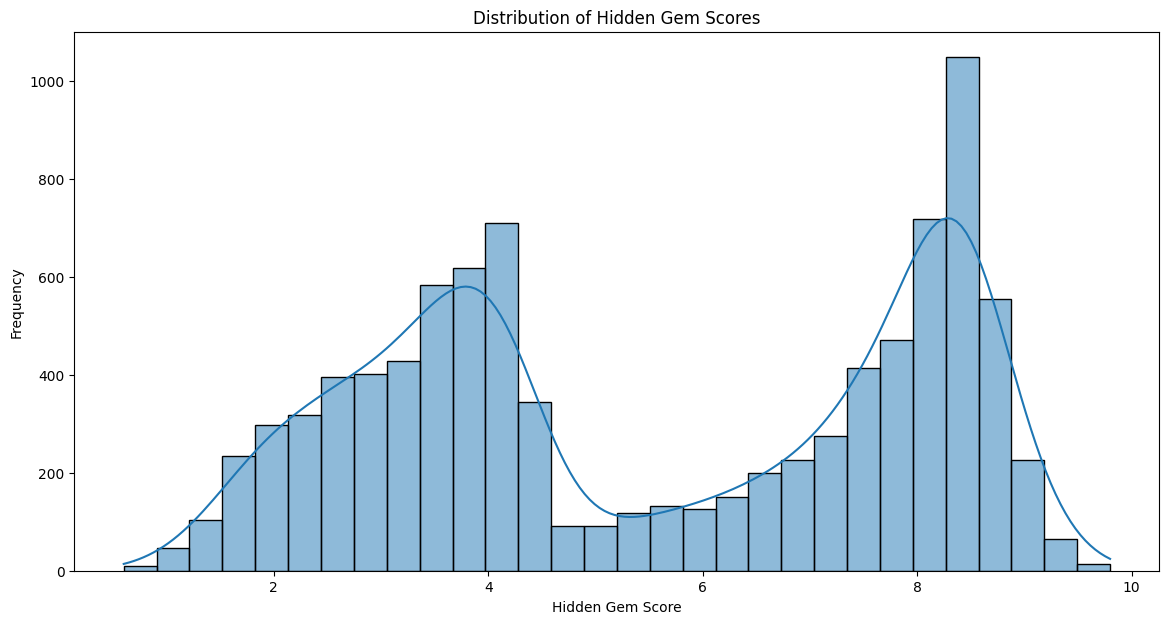

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

flixgem_df = dataframes['FlixGem.com dataset']

plt.figure(figsize=(14, 7))
sns.histplot(flixgem_df['Hidden Gem Score'].dropna(), bins=30, kde=True)
plt.title('Distribution of Hidden Gem Scores')
plt.xlabel('Hidden Gem Score')
plt.ylabel('Frequency')
plt.show()

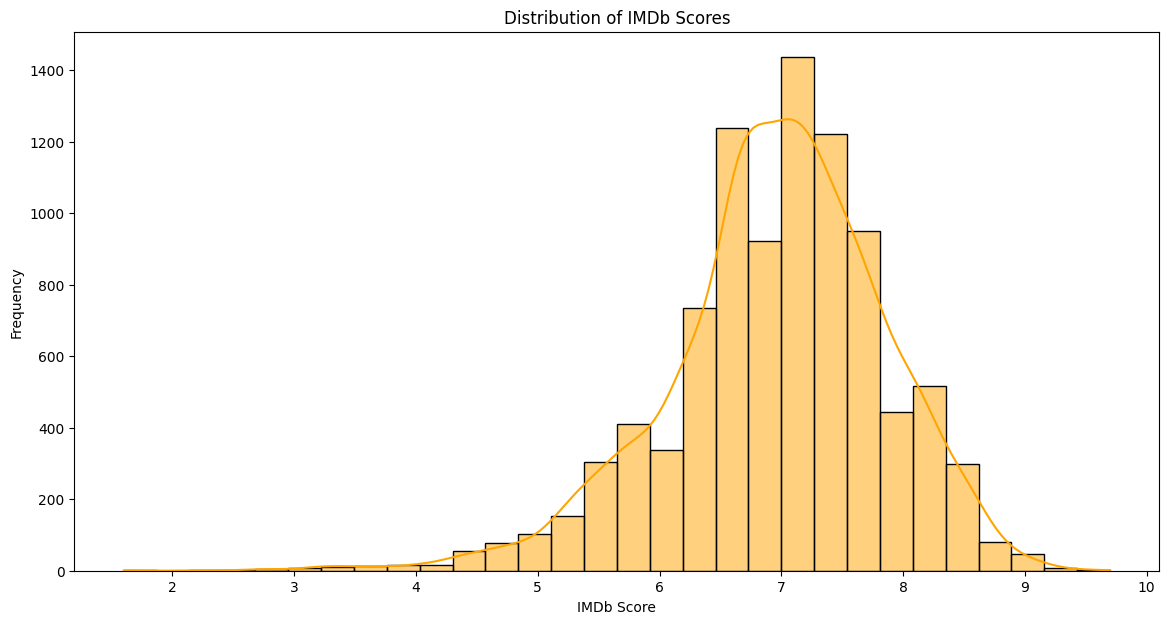

In [10]:
plt.figure(figsize=(14, 7))

sns.histplot(flixgem_df['IMDb Score'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.show()

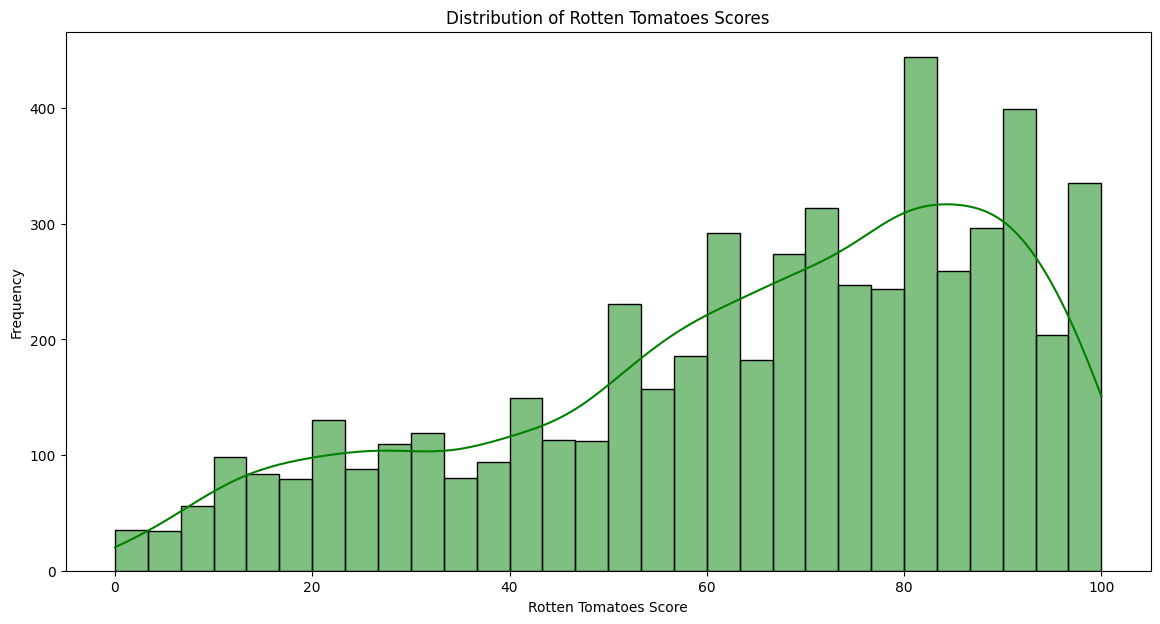

In [9]:
plt.figure(figsize=(14, 7))

sns.histplot(flixgem_df['Rotten Tomatoes Score'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of Rotten Tomatoes Scores')
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Frequency')
plt.show()

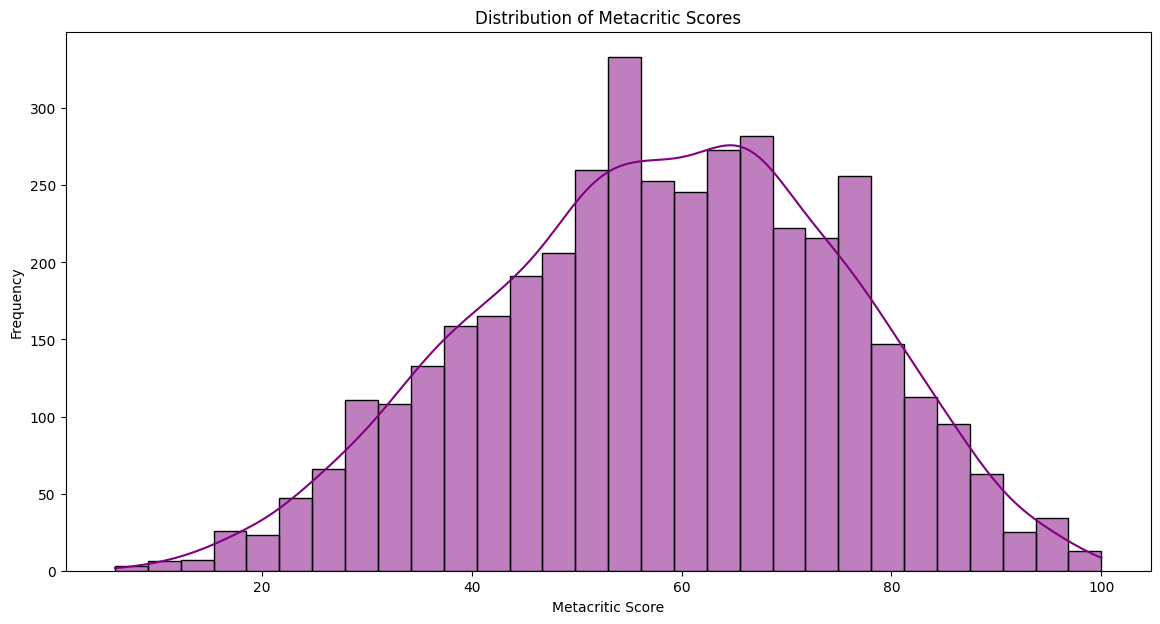

In [11]:
plt.figure(figsize=(14, 7))

sns.histplot(flixgem_df['Metacritic Score'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of Metacritic Scores')
plt.xlabel('Metacritic Score')
plt.ylabel('Frequency')
plt.show()

In [12]:
flixgem_df.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
count,9415.000000,9417.000000,5445.000000,4082.000000,5226.000000,6376.000000,3.754000e+03,9217,9425,9.415000e+03
mean,5.540733,6.955517,64.691276,58.113425,9.735936,16.035602,4.845788e+07,2010-09-14 00:48:44.682651648,2017-11-19 08:53:13.209549056,6.014725e+04
min,0.600000,1.600000,0.000000,6.000000,1.000000,1.000000,7.200000e+01,1913-10-27 00:00:00,2015-04-14 00:00:00,5.000000e+00
25%,3.400000,6.500000,49.000000,46.000000,1.250000,2.000000,1.243910e+06,2007-08-03 00:00:00,2015-08-13 00:00:00,9.695000e+02
50%,5.300000,7.000000,70.000000,59.000000,4.000000,6.000000,2.250466e+07,2014-10-10 00:00:00,2017-12-29 00:00:00,6.602000e+03
75%,8.100000,7.500000,85.000000,71.000000,9.000000,15.000000,6.425437e+07,2018-01-03 00:00:00,2019-10-05 00:00:00,5.098700e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,6.593639e+08,2021-11-12 00:00:00,2021-03-04 00:00:00,2.354197e+06
std,2.447462,0.899681,25.269466,17.143187,19.524116,32.209094,7.243625e+07,NaN,NaN,1.463837e+05


In [13]:
flixgem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Title                  9399 non-null   object        
 1   Genre                  9400 non-null   object        
 2   Tags                   9389 non-null   object        
 3   Languages              9255 non-null   object        
 4   Series or Movie        9425 non-null   object        
 5   Hidden Gem Score       9415 non-null   float64       
 6   Country Availability   9414 non-null   object        
 7   Runtime                9424 non-null   object        
 8   Director               7120 non-null   object        
 9   Writer                 7615 non-null   object        
 10  Actors                 9314 non-null   object        
 11  View Rating            6827 non-null   object        
 12  IMDb Score             9417 non-null   float64       
 13  Rot

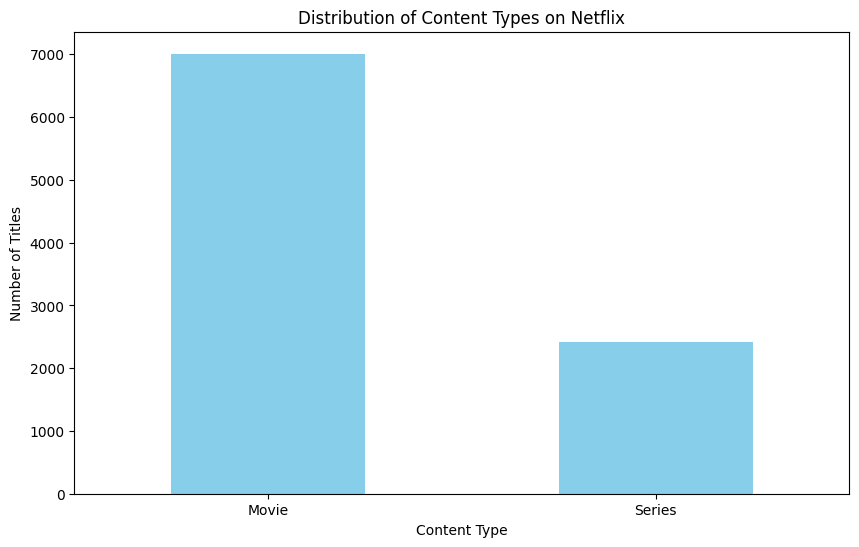

In [14]:
content_type_counts = flixgem_df['Series or Movie'].value_counts()

plt.figure(figsize=(10, 6))
content_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.show()

In [15]:
flixgem_df['Genre'].value_counts().head(10)

Genre
Drama                             647
Comedy                            591
Documentary                       346
Drama, Romance                    328
Comedy, Drama                     304
Comedy, Drama, Romance            279
Comedy, Romance                   257
Crime, Drama, Thriller            143
Action, Crime, Thriller           137
Action, Crime, Drama, Thriller    108
Name: count, dtype: int64

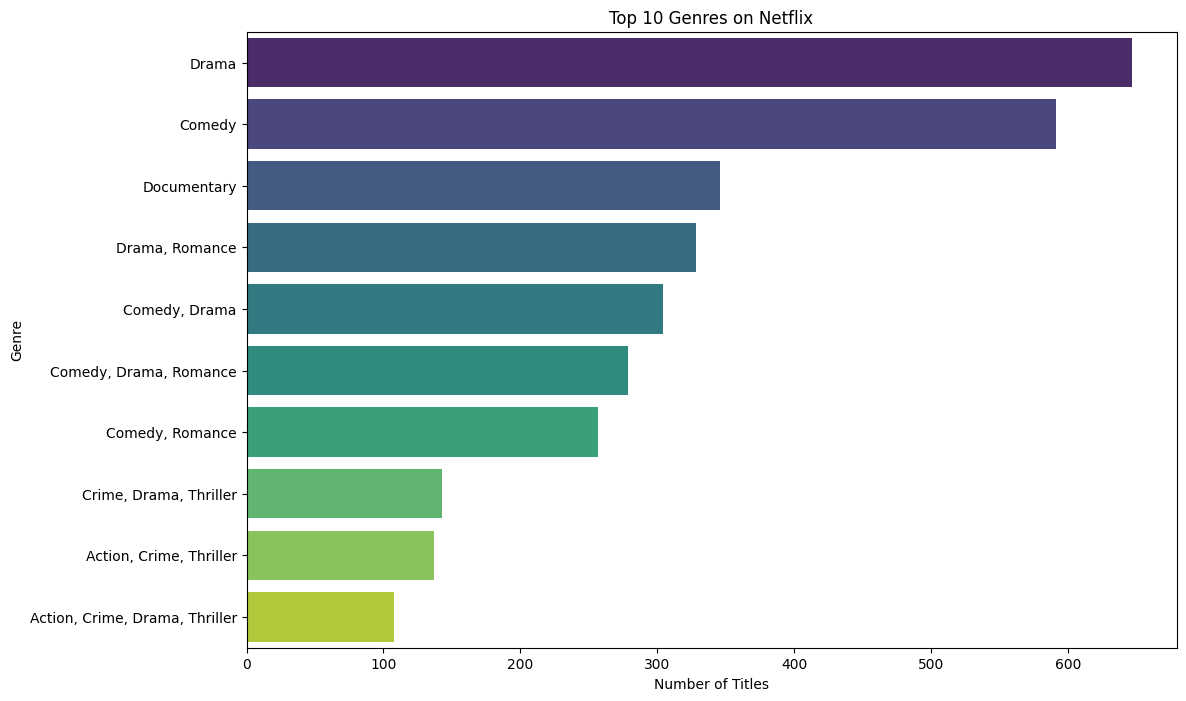

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Genre', data=flixgem_df, order=flixgem_df['Genre'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

In [17]:
flixgem_df['Country Availability'].value_counts().head(10)

Country Availability
Japan                                    637
South Korea                              415
United Kingdom                           243
United States                            211
Switzerland,Germany                      170
Canada                                   138
Australia                                101
Italy                                     97
Poland                                    88
Hong Kong,Thailand,Singapore,Malaysia     85
Name: count, dtype: int64

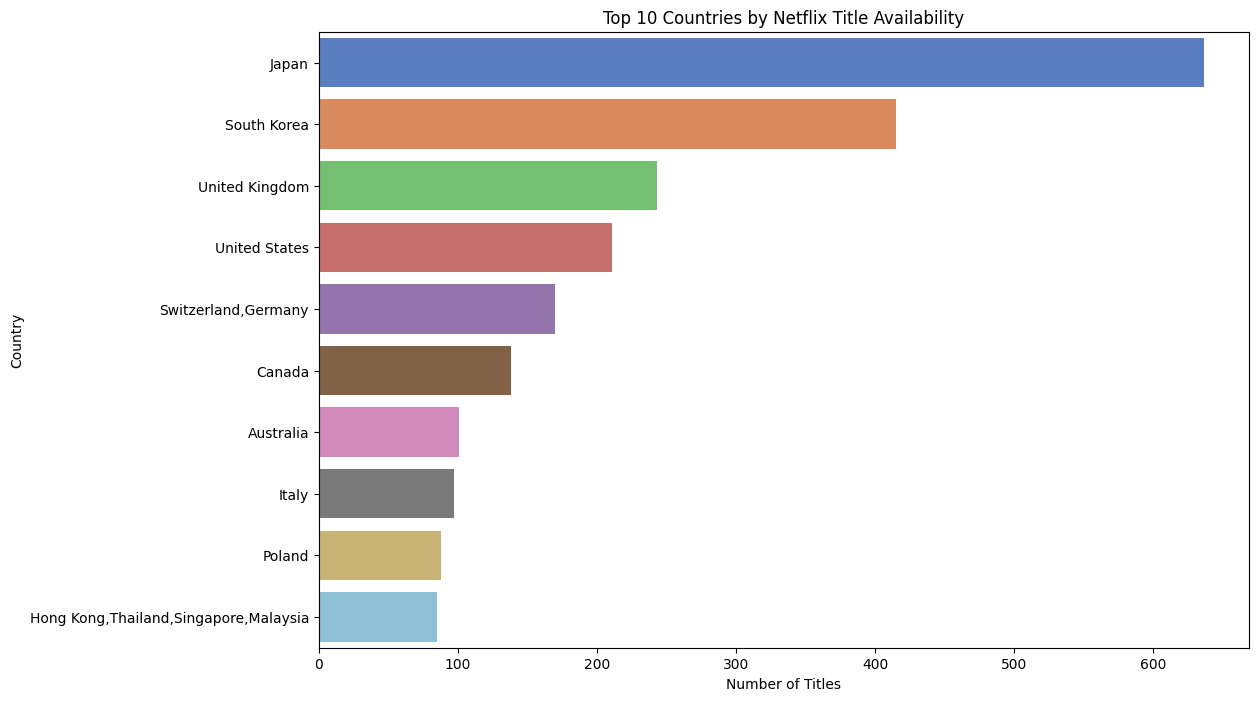

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Country Availability', data=flixgem_df, order=flixgem_df['Country Availability'].value_counts().index[:10], palette='muted')
plt.title('Top 10 Countries by Netflix Title Availability')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [19]:
flixgem_df['Split Genres'] = flixgem_df['Genre'].str.split(', ')
exploded_genres = flixgem_df.explode('Split Genres')
average_imdb_scores = exploded_genres.groupby('Split Genres')['IMDb Score'].mean().sort_values(ascending=False)
average_imdb_scores.head(10)

Split Genres
Talk-Show      7.882353
News           7.557143
Documentary    7.416687
Reality-TV     7.360360
Game-Show      7.340625
Short          7.329193
Animation      7.320290
Adult          7.280000
History        7.225000
War            7.162411
Name: IMDb Score, dtype: float64

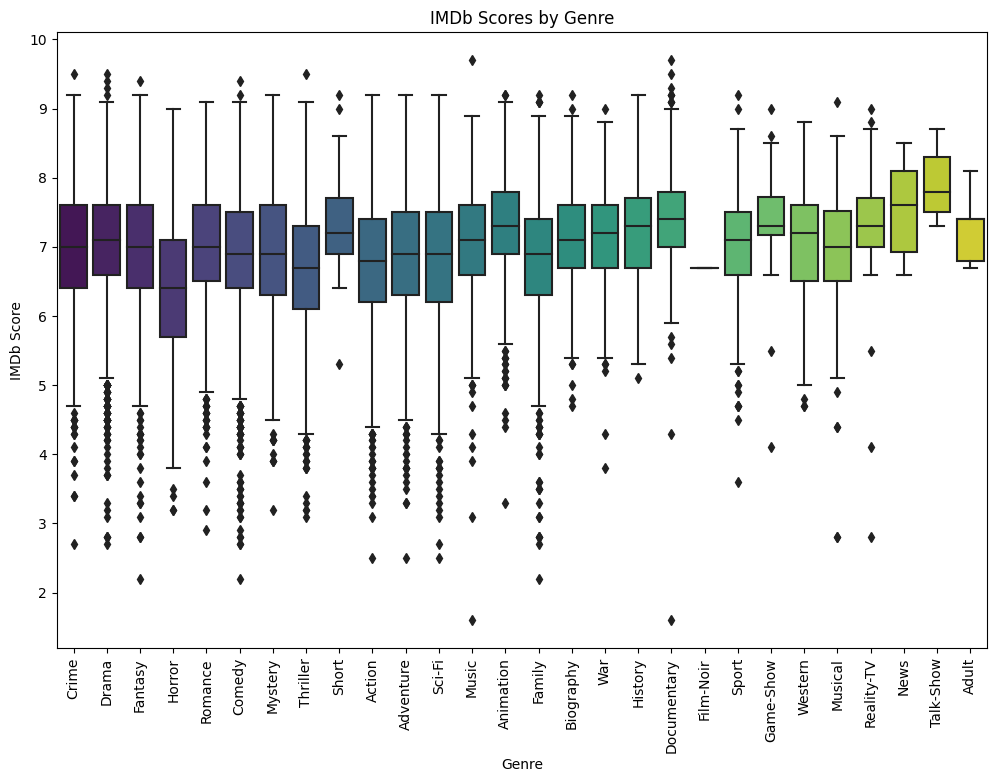

In [21]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(x='Split Genres', y='IMDb Score', data=exploded_genres, palette='viridis')
plt.title('IMDb Scores by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Score')
plt.xticks(rotation=90)
plt.show()

In [22]:
exploded_genres.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,Split Genres
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube,Crime
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube,Drama
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube,Fantasy
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube,Horror
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube,Romance


In [23]:
correlation = exploded_genres[['Hidden Gem Score', 'IMDb Score']].corr()
print(correlation)

                  Hidden Gem Score  IMDb Score
Hidden Gem Score          1.000000    0.402152
IMDb Score                0.402152    1.000000


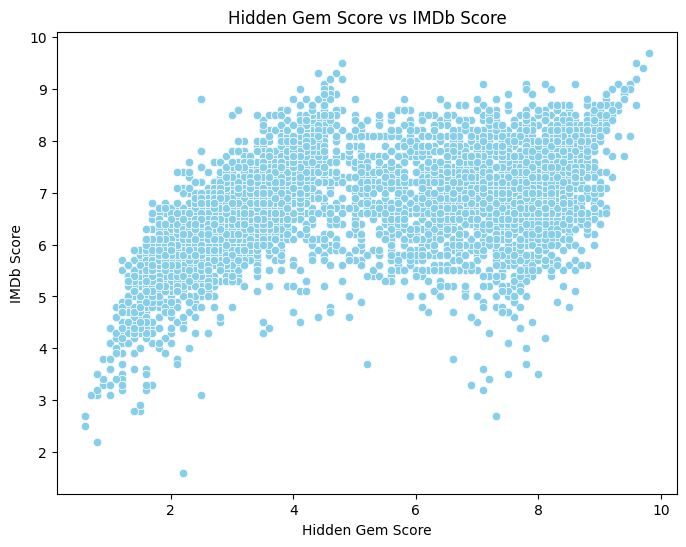

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hidden Gem Score', y='IMDb Score', data=exploded_genres, color='skyblue')
plt.title('Hidden Gem Score vs IMDb Score')
plt.xlabel('Hidden Gem Score')
plt.ylabel('IMDb Score')
plt.show()